<a href="https://colab.research.google.com/github/thedreadpersephone/data-and-python/blob/main/Group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Access to green space


---

### Define the problem
Research shows that access to green space is important for physical and mental health. We would like to investigate this with a particular focus on whether deprivation has an impact on access to green space. We will be concentrating on data relating to Scotland.

### The data
This is a combination of data about access to green spaces from the ONS:
https://www.ons.gov.uk/economy/environmentalaccounts/datasets/accesstopublicgreenspaceingreatbritain
And data from the Scottish Index of Multiple Deprivation:
https://simd.scot/#/simd2020/BTTTFTT/9/-4.0000/55.9000/https://simd.scot/#/simd2020/BTTTFTT/9/-4.0000/55.9000/
### Preparation
Before uploading to Github, we have prepared the data using Excel in the following ways:

*   Removing data relating to England and Wales
*   Removing columns which were not required such as country code
*   Keeping columns of interest such as health related data
*   Using power query to join the tables
*   Tidied up columns and made headers more descriptive
*   Formatted cells to show percentage where appropriate
*   Used VLOOKUP to combine urban and rural tables and added a rural/urban column




We will now import the data into this Colab worksheet.





In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/thedreadpersephone/data-and-python/refs/heads/main/Group%20Project%20CSV%20All.csv"
df = pd.read_csv(url)
pd.options.display.width = None
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_colwidth', None)
#This ensures all the columns can be viewed throughout the worksheet
display (df.head())

,Place Code,Intermediate Zone,Local Authority,Local Authority (code),Population,Working Age population,Average distance to nearest park or public garden (m),Median distance to nearest park or public garden (m),Average size of nearest park or public garden (m2),Median size of nearest park or public garden (m2),"Average number of parks and public gardens in 1,000 m radius","Median number of parks and public gardens in 1,000 m radius","Average combined size of parks and public gardens in 1,000 m radius (m2)","Median combined size of parks and public gardens in 1,000 m radius (m2)",Average population per park or public garden,Median population per park or public garden,Number of flats in rural and built up areas,Number of flats in rural and built up areas with gardens,Average garden size for flats in built up area,Number of houses in rural and built up area,Number of houses in rural and built up area with gardens,Average garden size for houses in rural and built up area,SIMD2020 Rank,SIMD2020 Quintile,SIMD2020 Health Domain Rank,Alcohol Hospital visits ratio,Drug hospital visits ratio,Depression (%),Crime Rate,Overcrowded rate,Drive to secondary,Urban or Rural
0,S01006506,Culter,Aberdeen City,S12000033,850,580,427.50,335.17,1357.42,1357.42,1.0,1.0,1357.0,1357.0,13450.42,13450.42,304,188.94,545.56,180,162,638.52,4691,4,5174,28.73,30.37,13.15%,124.60,10.21%,9.93,URBAN
1,S01006507,Culter,Aberdeen City,S12000033,791,470,666.52,656.02,1357.42,1357.42,1.0,1.0,1357.0,1357.0,13450.42,13450.42,73,45.37,545.56,295,280,308.00,4862,4,5051,129.92,126.43,14.25%,127.70,10.17%,11.04,URBAN
2,S01006508,Culter,Aberdeen City,S12000033,604,461,203.99,175.02,1357.42,1357.42,1.0,1.0,1357.0,1357.0,13450.42,13450.42,255,158.48,545.56,101,99,381.28,5686,5,5942,71.02,18.27,12.81%,129.83,4.82%,10.62,URBAN
3,S01006509,Culter,Aberdeen City,S12000033,525,307,453.95,485.87,1357.42,1357.42,1.0,1.0,1357.0,1357.0,13450.42,13450.42,91,56.56,545.56,192,182,239.97,4332,4,3871,80.47,28.49,16.40%,75.43,7.24%,10.04,URBAN
4,S01006510,Culter,Aberdeen City,S12000033,660,415,610.13,594.37,1357.42,1357.42,1.0,1.0,1357.0,1357.0,13450.42,13450.42,139,86.39,545.56,176,176,352.36,3913,3,3049,89.11,44.29,22.06%,168.01,8.67%,9.65,URBAN


###Exploring the data
Below we can see that there are a small number of null values in the dataset, with one or two values missing from the Alcohol Hospital visits ratio, Drug hospital visits ratio, Depression (%), Crime Rate and Overcrowded rate columns. We can see there are no duplicated rows. We can also see that some of the columns contain object datatypes, which may cause difficulty later if we wish to perform calculations.


In [ ]:
def investigate_data(df):
  df.info()
  duplicates = df[df.duplicated()]
  display(duplicates)
investigation = investigate_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6976 entries, 0 to 6975
Data columns (total 32 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Place Code                                                                6976 non-null   object 
 1   Intermediate Zone                                                         6976 non-null   object 
 2   Local Authority                                                           6976 non-null   object 
 3   Local Authority (code)                                                    6976 non-null   object 
 4   Population                                                                6976 non-null   int64  
 5   Working Age population                                                    6976 non-null   int64  
 6   Average distance to nearest park or public garden (m)           

,Place Code,Intermediate Zone,Local Authority,Local Authority (code),Population,Working Age population,Average distance to nearest park or public garden (m),Median distance to nearest park or public garden (m),Average size of nearest park or public garden (m2),Median size of nearest park or public garden (m2),"Average number of parks and public gardens in 1,000 m radius","Median number of parks and public gardens in 1,000 m radius","Average combined size of parks and public gardens in 1,000 m radius (m2)","Median combined size of parks and public gardens in 1,000 m radius (m2)",Average population per park or public garden,Median population per park or public garden,Number of flats in rural and built up areas,Number of flats in rural and built up areas with gardens,Average garden size for flats in built up area,Number of houses in rural and built up area,Number of houses in rural and built up area with gardens,Average garden size for houses in rural and built up area,SIMD2020 Rank,SIMD2020 Quintile,SIMD2020 Health Domain Rank,Alcohol Hospital visits ratio,Drug hospital visits ratio,Depression (%),Crime Rate,Overcrowded rate,Drive to secondary,Urban or Rural


###Converting columns
We need to convert the three columns which contain a percentage symbol into float if we want to use them in any calculations. We have also replaced '*' with null values and dropped rows with null values as otherwise we will be unable to look at correlations with these columns.

In [ ]:
def convert_columns(df):
  df = df.replace('*', pd.NA)
  #replaces * with NA values
  df = df.dropna()
  #drops rows with NA values
  df[["Depression (%)", "Overcrowded rate", "Crime Rate"]] = df[["Depression (%)", "Overcrowded rate", "Crime Rate"]].replace({'%': ''}, regex=True).astype(float)
  #removes % symbols and converts strings to float
  print(df[["Depression (%)", "Overcrowded rate", "Crime Rate"]].dtypes)
  return df
converted_df = convert_columns(df)

Depression (%)      float64
Overcrowded rate    float64
Crime Rate          float64
dtype: object


###Summary Statistics


Below we have displayed the summary statistics for this dataset, including the columns which we have just converted to float.

In [ ]:
def summarise_data(df):
  display(df.describe())
summarise_data(converted_df)


,Population,Working Age population,Average distance to nearest park or public garden (m),Median distance to nearest park or public garden (m),Average size of nearest park or public garden (m2),Median size of nearest park or public garden (m2),"Average number of parks and public gardens in 1,000 m radius","Median number of parks and public gardens in 1,000 m radius","Average combined size of parks and public gardens in 1,000 m radius (m2)","Median combined size of parks and public gardens in 1,000 m radius (m2)",Average population per park or public garden,Median population per park or public garden,Number of flats in rural and built up areas,Number of flats in rural and built up areas with gardens,Average garden size for flats in built up area,Number of houses in rural and built up area,Number of houses in rural and built up area with gardens,Average garden size for houses in rural and built up area,SIMD2020 Rank,SIMD2020 Quintile,SIMD2020 Health Domain Rank,Alcohol Hospital visits ratio,Drug hospital visits ratio,Depression (%),Crime Rate,Overcrowded rate,Drive to secondary
count,6475.000000,6475.000000,6475.000000,6475.000000,6.475000e+03,6.475000e+03,6475.000000,6475.000000,6.475000e+03,6.475000e+03,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000
mean,788.740077,508.162008,1362.827858,1352.337527,2.153058e+05,2.093497e+05,2.260727,2.254981,4.016676e+05,4.006540e+05,11138.156633,11162.521127,157.203243,115.840907,419.577983,227.921544,219.131583,320.054877,3343.339151,2.900232,3344.752741,107.103686,104.098888,19.351568,309.856019,11.433364,5.917844
std,232.865987,177.529290,2772.332308,2801.161667,5.927700e+05,6.391746e+05,1.692251,1.735371,7.940937e+05,8.464752e+05,7134.896941,7487.748128,162.223248,120.459450,277.427694,128.427289,121.550519,270.685708,1995.159318,1.401902,1997.458494,99.643048,137.827636,5.394032,411.925653,7.871600,4.543169
min,256.000000,161.000000,56.640000,29.430000,3.375000e+01,3.375000e+01,1.000000,1.000000,3.300000e+01,3.300000e+01,616.950000,416.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.750000,10.830000,0.000000,1.020000
25%,642.000000,402.000000,278.855000,273.800000,1.558049e+04,1.042919e+04,1.000000,1.000000,3.383700e+04,2.581300e+04,5539.360000,5263.430000,35.000000,25.200000,279.250000,143.000000,138.500000,176.580000,1619.500000,2.000000,1621.500000,38.215000,18.100000,15.220000,114.500000,5.320000,3.610000
50%,763.000000,480.000000,531.050000,517.610000,4.930923e+04,3.667809e+04,1.630000,2.000000,1.260640e+05,1.066230e+05,9685.760000,9629.850000,99.000000,72.710000,352.500000,235.000000,228.000000,236.960000,3262.000000,3.000000,3260.000000,78.410000,55.640000,19.070000,211.110000,9.870000,4.830000
75%,894.000000,575.000000,1127.410000,1097.085000,1.372270e+05,1.260649e+05,3.000000,3.000000,3.497407e+05,3.194750e+05,14984.830000,15203.980000,239.000000,173.060000,466.610000,308.000000,297.000000,353.460000,5022.500000,4.000000,5038.500000,145.315000,141.215000,23.110000,379.695000,15.590000,6.710000
max,3658.000000,3423.000000,49864.520000,52414.800000,5.838160e+06,6.810339e+06,14.670000,15.000000,6.823985e+06,6.823985e+06,39740.110000,39740.110000,1333.000000,957.220000,2350.980000,1351.000000,1286.000000,2634.680000,6976.000000,5.000000,6976.000000,1656.370000,1826.420000,47.180000,12440.630000,58.390000,106.760000


###Correlations
These charts looks at the correlations between SIMD rank and the average distance to the nearest park or garden, SIMD health rank and average size of nearest park or garden, and SIMD quintile and average distance to nearest park or garden. In each case the r value is close to zero which suggests there may not be a relationship between the two variables and we can see this visually in the charts. The p value is above 0.05 which suggests the result is not significant.

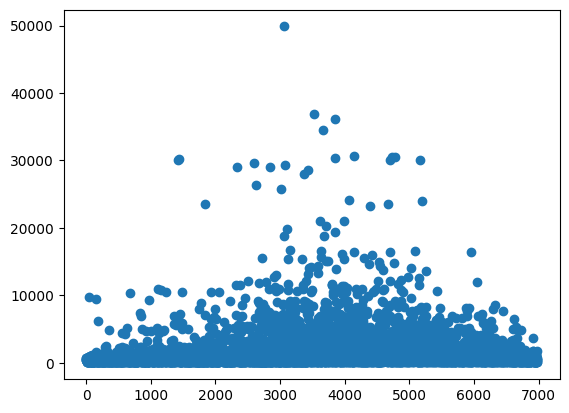

regression = LinregressResult(slope=0.12160472415656812, intercept=956.2620227470256, rvalue=0.08751504925756047, pvalue=1.7349047924431899e-12, stderr=0.01720463228596406, intercept_stderr=66.98318754623811)
regression slope = 0.12160472415656812
intercept = 956.2620227470256
r value = 0.08751504925756047


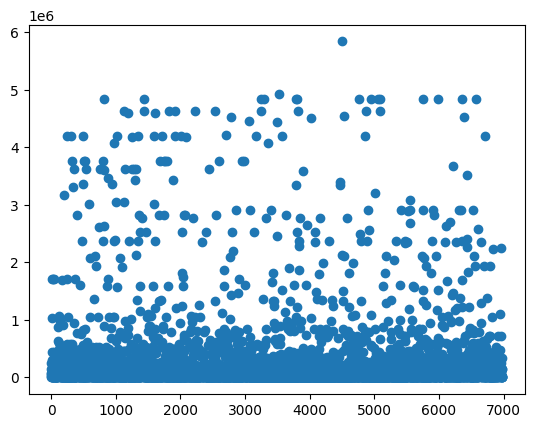

regression = LinregressResult(slope=-2.714140346181709, intercept=224383.97738559262, rvalue=-0.009145845756809552, pvalue=0.46184293215614103, stderr=3.688395302807439, intercept_stderr=14368.936805019024)
regression slope = -2.714140346181709
intercept = 224383.97738559262
r value = -0.009145845756809552


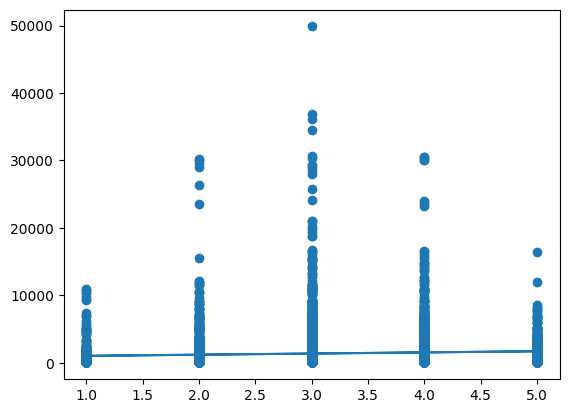

regression = LinregressResult(slope=170.5730307567943, intercept=868.1265537325345, rvalue=0.08625472141555672, pvalue=3.593494559903268e-12, stderr=24.48798763495578, intercept_stderr=78.8816226437374)
regression slope = 170.5730307567943
intercept = 868.1265537325345
r value = 0.08625472141555672


In [ ]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

def show_regression(df, column1, column2):
  x=df[column1]
  y=df[column2]
  #sets the variables
  regression = linregress(x,y)
  #calculates the linear regression
  slope=regression.slope
  intercept=regression.intercept
  plt.plot(x, slope*x + intercept)
  plt.scatter(x,y)
  plt.show()
  #plots a graph with linear regression line
  print("regression = " + str(regression))
  print("regression slope = " + str(regression.slope))
  print("intercept = " + str(regression.intercept))
  print("r value = " + str(regression.rvalue))

SIMD_rank_avg_distance = show_regression(converted_df, "SIMD2020 Rank", "Average distance to nearest park or public garden (m)")
SIMD_health_rank_avg_size = show_regression(converted_df, "SIMD2020 Health Domain Rank", "Average size of nearest park or public garden (m2)")
SIMD_quintile_avg_distance = show_regression(converted_df, "SIMD2020 Quintile","Average distance to nearest park or public garden (m)")


###Explore maximum
One of the charts above shows the maximum average distance to the nearest park or public garden is very high and below we have shown that this refers to a zone in the Shetland Islands. As the Shetland Islands are so remote, this explains why the average distance to the nearest park or public garden is unusually high.

In [ ]:
def display_max(df):
  display(df['Average distance to nearest park or public garden (m)'].max())
  max = (df['Average distance to nearest park or public garden (m)'].idxmax())
  display(df.iloc[max] )
display_max(converted_df)

49864.52

,879
Place Code,S01007385
Intermediate Zone,Helensburgh West and Rhu
Local Authority,Argyll and Bute
Local Authority (code),S12000035
Population,777
Working Age population,417
Average distance to nearest park or public garden (m),366.52
Median distance to nearest park or public garden (m),386.63
Average size of nearest park or public garden (m2),10754.24
Median size of nearest park or public garden (m2),10754.24


###Heatmap of all numeric columns
The heatmap below shows which columns are correlated with each other. However there are too many columns to show anything clearly so we will narrow that down in the next section.

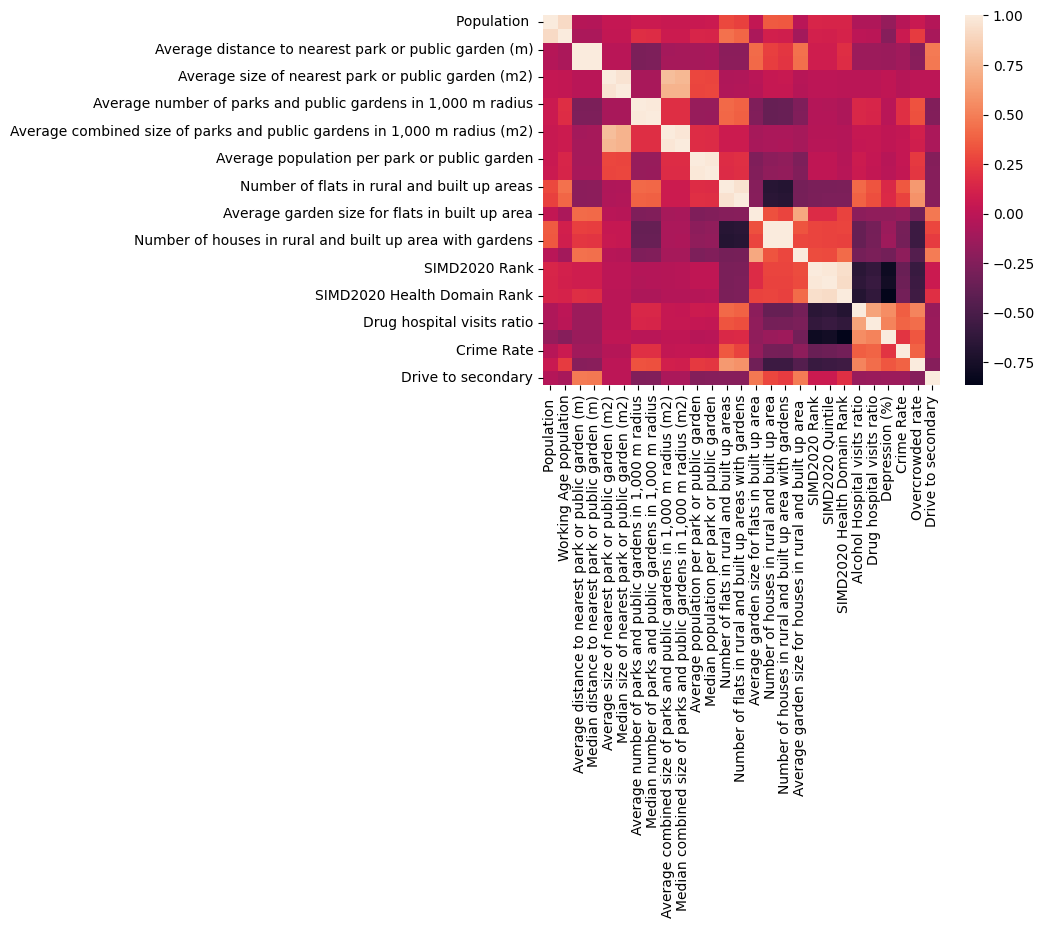

In [ ]:
import seaborn as sn
def plot_heatmap(df):
  cols_to_drop = ['Place Code', 'Intermediate Zone', 'Local Authority', 'Local Authority (code)', 'Urban or Rural']
  heatmap_df = df.drop(columns=cols_to_drop)
  sn.heatmap(heatmap_df.corr())
  plt.show()
plot_heatmap(converted_df)

### Heatmaps of parks, housing and SIMD data in urban and rural areas
The heatmaps below examine correlations between a more limited number of columns from the dataset and are filtered for urban or rural areas, however no interesting relationships can be seen. There are no obvious differences between rural and urban areas.

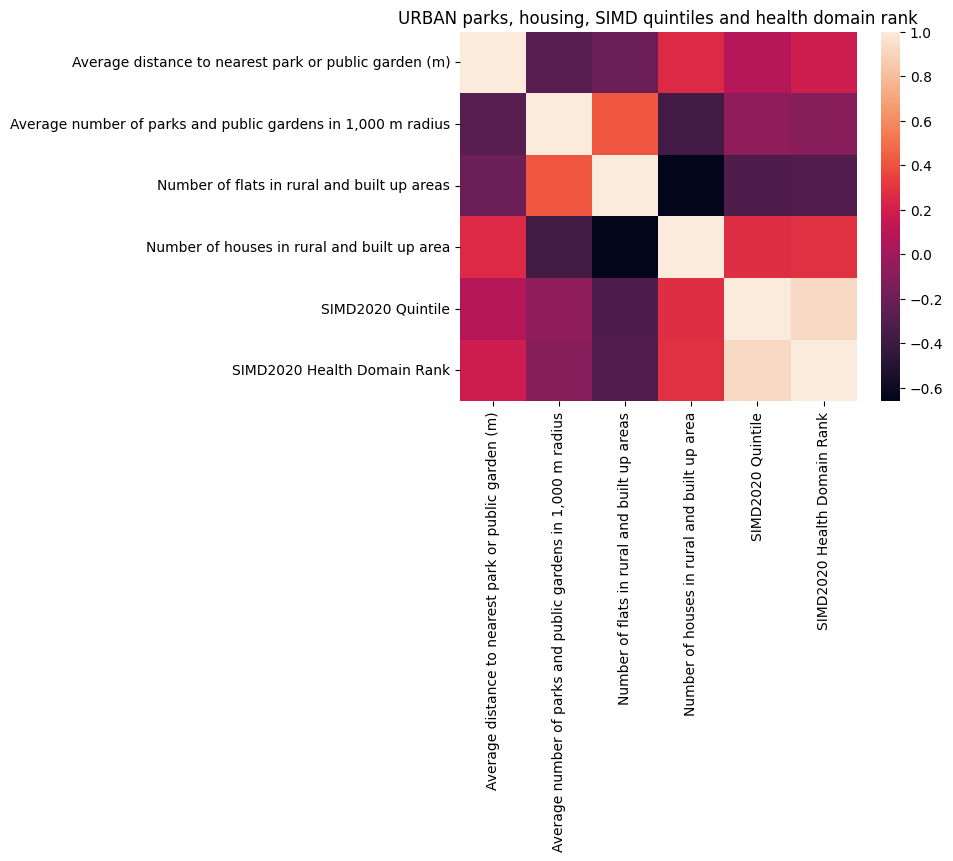

In [ ]:
def plot_heatmap():
  urban_df = df[df["Urban or Rural"] == "URBAN"]
  cols_to_keep = ['Average distance to nearest park or public garden (m)',
                  'Average number of parks and public gardens in 1,000 m radius',
                  'Number of flats in rural and built up areas',
                  'Number of houses in rural and built up area',
                  'SIMD2020 Quintile', 'SIMD2020 Health Domain Rank']
  heatmap_df = df[cols_to_keep]
  sn.heatmap(heatmap_df.corr())
  plt.title("URBAN parks, housing, SIMD quintiles and health domain rank")
  plt.show()
plot_heatmap()

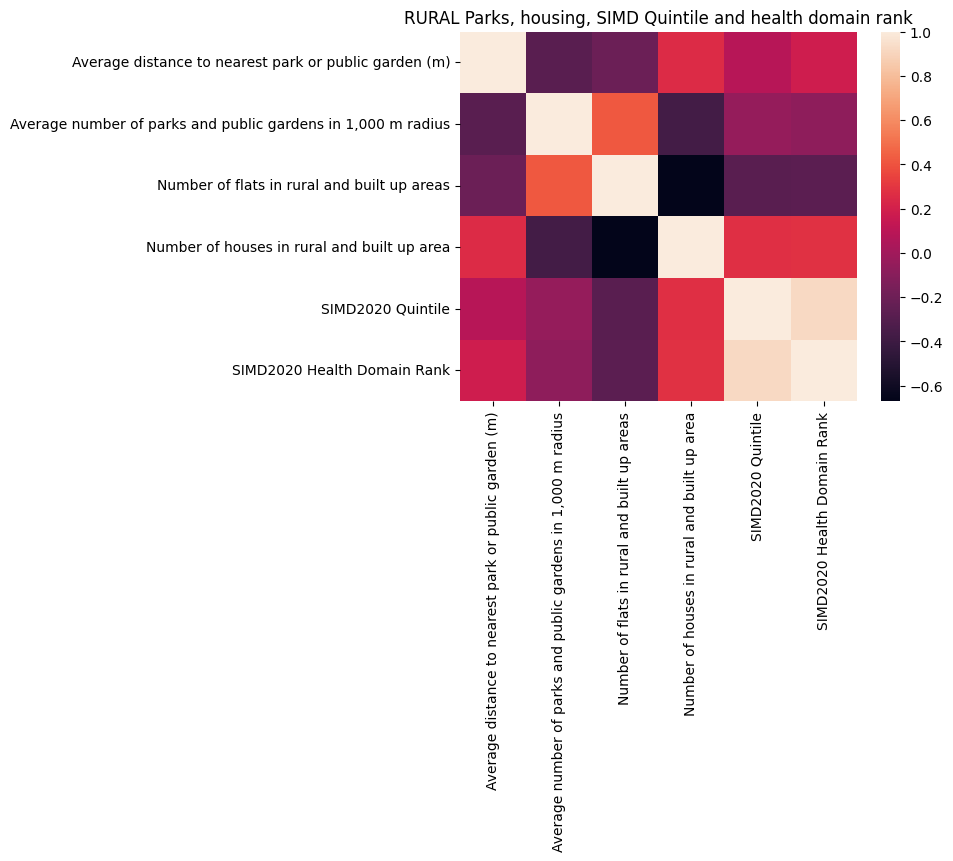

In [ ]:
def plot_heatmap(df):
  urban_df = df[df["Urban or Rural"] == "RURAL"]
  cols_to_keep = ['Average distance to nearest park or public garden (m)',
                  'Average number of parks and public gardens in 1,000 m radius',
                  'Number of flats in rural and built up areas',
                  'Number of houses in rural and built up area',
                  'SIMD2020 Quintile', 'SIMD2020 Health Domain Rank']
  heatmap_df = df[cols_to_keep]
  sn.heatmap(heatmap_df.corr())
  plt.title("RURAL Parks, housing, SIMD Quintile and health domain rank")
  plt.show()
plot_heatmap(converted_df)

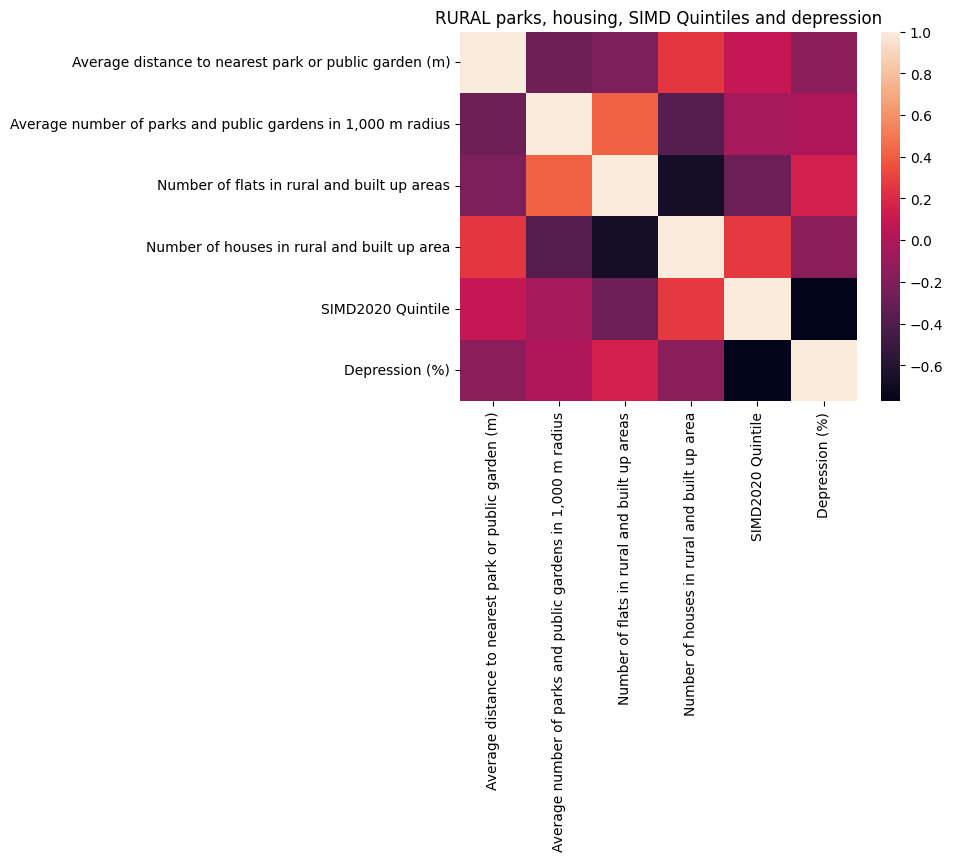

In [ ]:
def plot_heatmap(df):
  urban_df = df[df["Urban or Rural"] == "RURAL"]
  cols_to_keep = ['Average distance to nearest park or public garden (m)',
                  'Average number of parks and public gardens in 1,000 m radius',
                  'Number of flats in rural and built up areas',
                  'Number of houses in rural and built up area',
                  'SIMD2020 Quintile', 'Depression (%)']
  heatmap_df = df[cols_to_keep]
  sn.heatmap(heatmap_df.corr())
  plt.title("RURAL parks, housing, SIMD Quintiles and depression")
  plt.show()
plot_heatmap(converted_df)

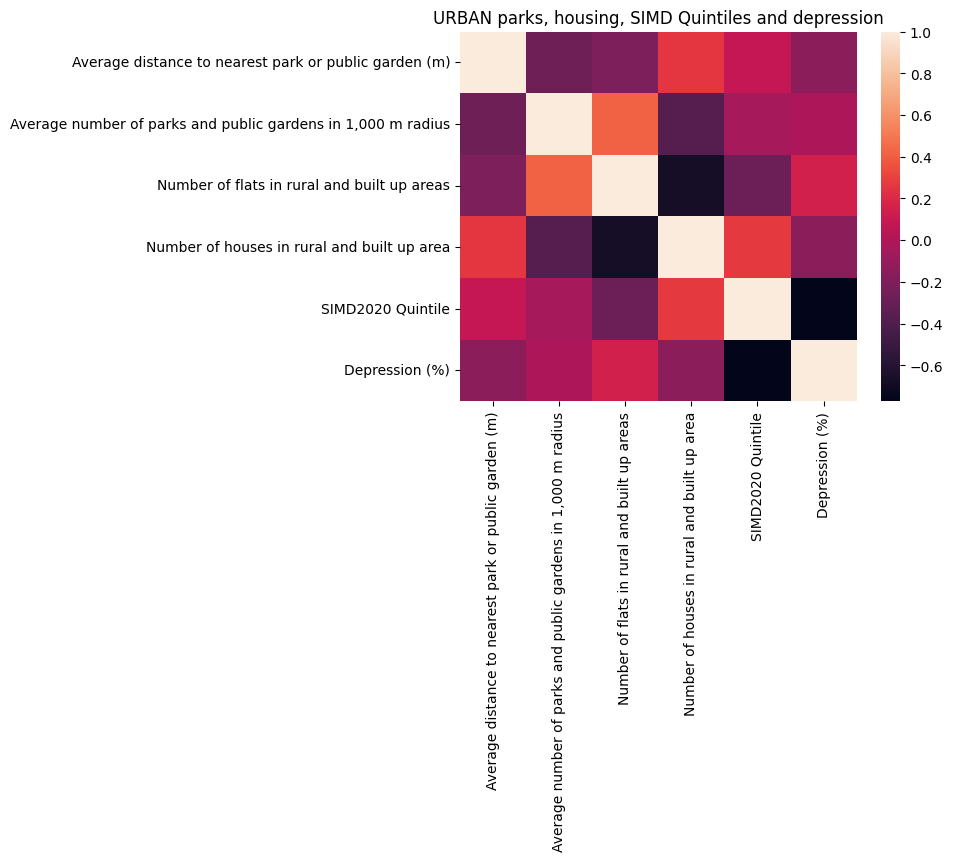

In [ ]:
def plot_heatmap(df):
  urban_df = df[df["Urban or Rural"] == "URBAN"]
  cols_to_keep = ['Average distance to nearest park or public garden (m)',
                  'Average number of parks and public gardens in 1,000 m radius',
                  'Number of flats in rural and built up areas',
                  'Number of houses in rural and built up area',
                  'SIMD2020 Quintile', 'Depression (%)']
  heatmap_df = df[cols_to_keep]
  sn.heatmap(heatmap_df.corr())
  plt.title("URBAN parks, housing, SIMD Quintiles and depression")
  plt.show()
plot_heatmap(converted_df)

###Next steps
Having not seen expected correlations, the group will now move on to exploring and visualising the data in PowerBI.